# Consumer Confidence

In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, MonthLocator, DateFormatter
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# path for the folder "project"
path = "C:\\Users\\pedro\\OneDrive\\NYU\\CSS\\II. Data Skills\\project"
os.chdir(path)

# importing aux functions (see charts_inflation.ipynb for more details)
import functions as fn

plt.style.use('seaborn-bright')
plt.rcParams['figure.dpi'] = 200 # high quality figure.
%matplotlib inline

In [39]:
# loading data
michigan = pd.read_parquet("data\\consumer_confidence\\data_michigan_consumer_confidence.parquet")
conf_board = pd.read_parquet("data\\consumer_confidence\\data_conf_board.parquet")

## Michigan

In [40]:
display(michigan.head())
michigan.series_id.unique() # see pdf with data definitions

,series_id,date,value
0,ics_all,1978-01-01,83.7
1,ics_all,1978-02-01,84.3
2,ics_all,1978-03-01,78.8
3,ics_all,1978-04-01,81.6
4,ics_all,1978-05-01,82.9


array(['ics_all', 'ics_inc31', 'ics_inc32', 'ics_inc33', 'ics_a1834',
       'ics_a3554', 'ics_a5597', 'ics_ne', 'ics_nc', 'ics_s', 'ics_w',
       'icc_all', 'ice_all', 'pago_f_all', 'pago_s_all', 'pago_u_all',
       'pago_dk_all', 'pago_r_all', 'pagorn_hy_all', 'pagorn_ha_all',
       'pagorn_ld_all', 'pagorn_ly_all', 'pagorn_hp_all', 'pagorn_la_all',
       'pagorn_hd_all', 'pagorn_ny_all', 'pagorn_nad_all', 'pexp_f_all',
       'pexp_s_all', 'pexp_u_all', 'pexp_dk_all', 'pexp_r_all',
       'ptrd_bb_all', 'ptrd_bs_all', 'ptrd_ss_all', 'ptrd_ws_all',
       'ptrd_ww_all', 'ptrd_bw_all', 'ptrd_dk_all', 'ptrd_r_all',
       'pago5_f_all', 'pago5_s_all', 'pago5_u_all', 'pago5_dk_all',
       'pago5_r_all', 'pexp5_f_all', 'pexp5_s_all', 'pexp5_u_all',
       'pexp5_dk_all', 'pexp5_r_all', 'ptrd5_bb_all', 'ptrd5_bs_all',
       'ptrd5_ss_all', 'ptrd5_ws_all', 'ptrd5_ww_all', 'ptrd5_bw_all',
       'ptrd5_dk_all', 'ptrd5_r_all', 'inex_dwn_all', 'inex_0_all',
       'inex_12_all', 'inex_3

In [41]:
# pagorn_hp_all: Higher prices
# px1_mean_all: do you think that prices in general will go up, or go down (12 months)
# px5_mean_all: do you think that prices in general will go up, or go down (5y)
# DURRN_NP_all: Housue durable goods inflation
# VEHRN_NP_all: automobiles
# GAS1PX_MEAN_all: 12 months gasoline prices
# GAS5PX_MEAN_all: 5y gasoline prices
# HOMVAL_R_all: house value today
# HOMPX1_MEAN_all: housing prices next 12 months
# HOMPX5_MEAN_all: housing prices next 5y


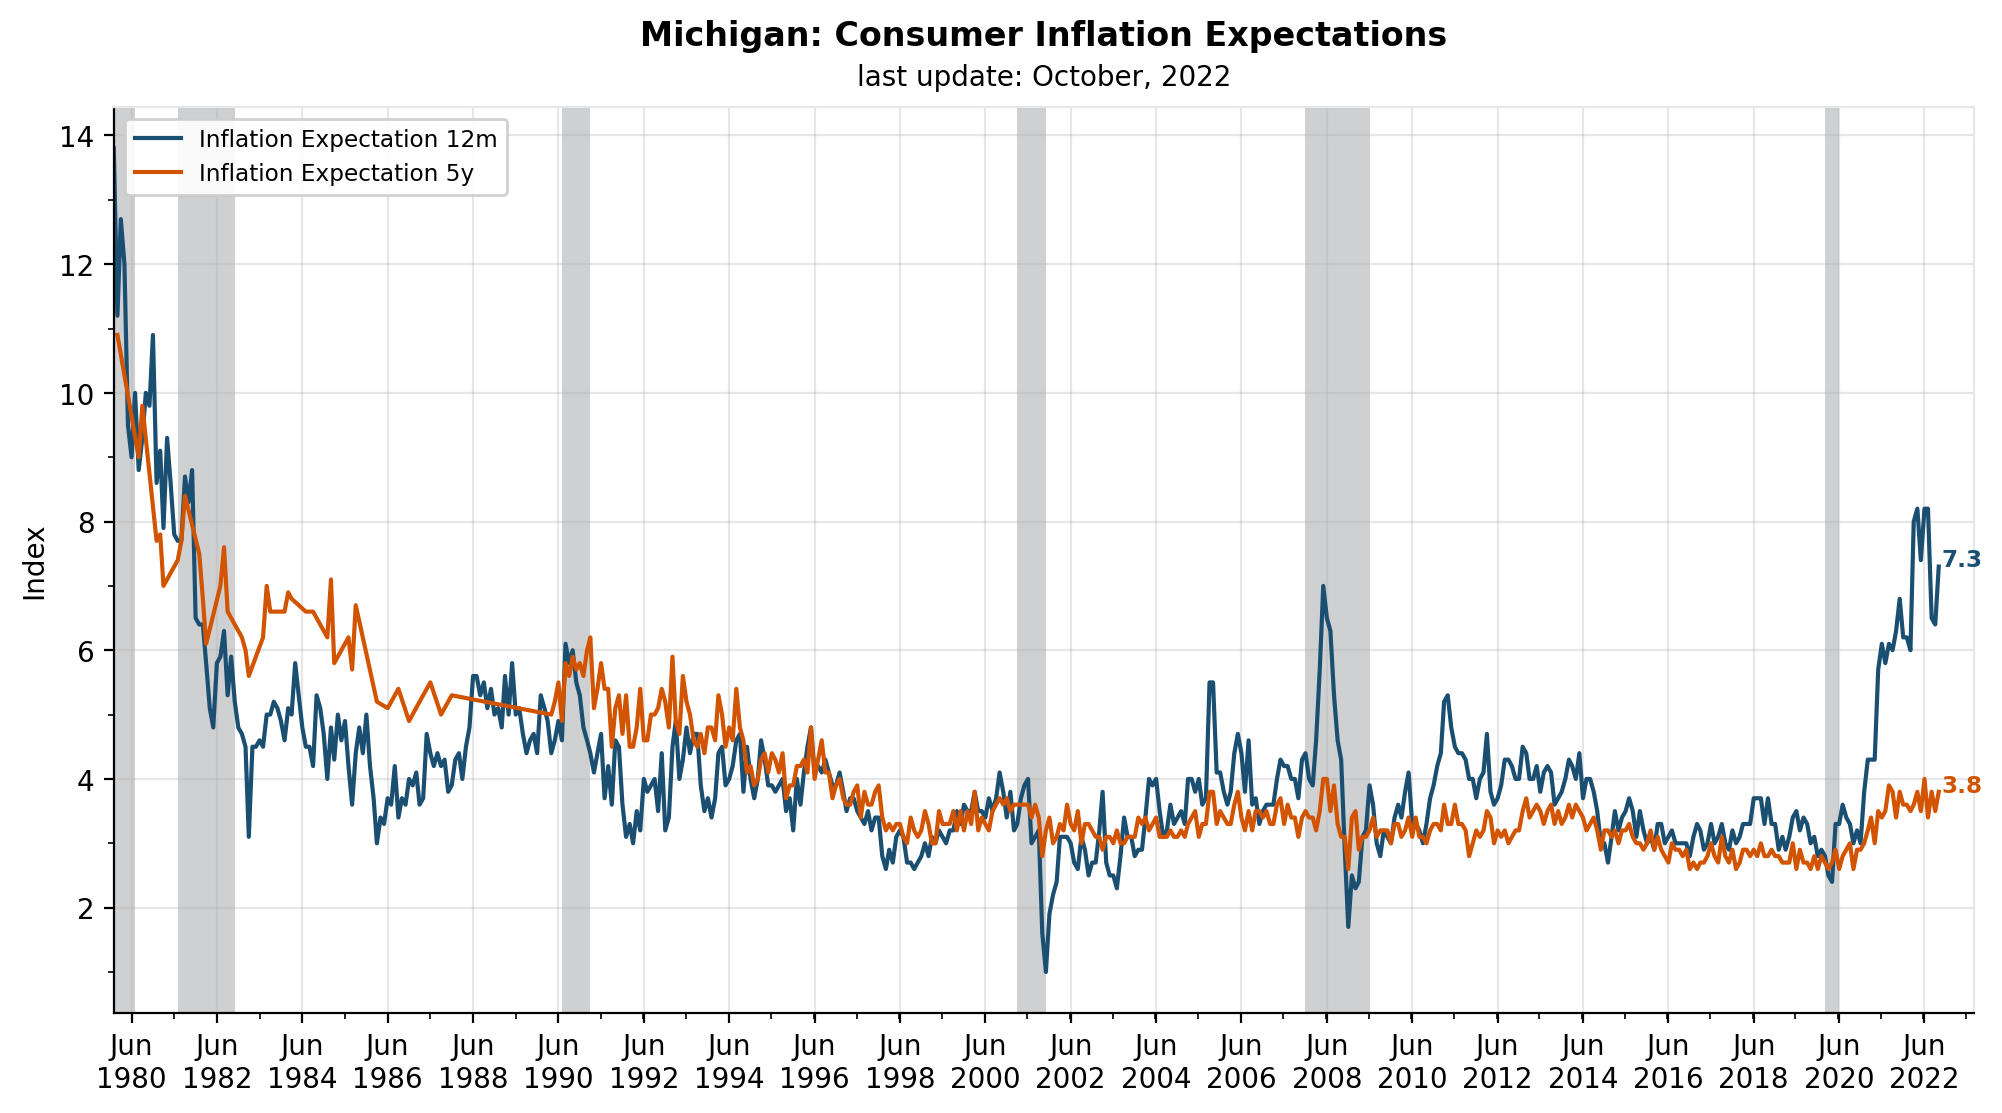

In [42]:
# px1_mean_all: do you think that prices in general will go up, or go down (12 months)
# px5_mean_all: do you think that prices in general will go up, or go down (5y)

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

data = (
    michigan[michigan["series_id"].isin(["px1_mean_all","px5_mean_all"])]
    .copy()
    .replace(["px1_mean_all","px5_mean_all"],["Inflation Expectation 12m","Inflation Expectation 5y"])
)

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

# creating the df to map chart configuration:
df_code = pd.DataFrame({
    'series_id': ["Inflation Expectation 12m","Inflation Expectation 5y"],
    'hue': [fn.colors[0], fn.colors[1]],
    'alpha':[1,1],
    'annotation':[True,True]})

# plotting
fig, ax = fn.ts_plot(df = data,
                     df_map = df_code,
                     start_date = "1980-01-01",
                     title ='Michigan: Consumer Inflation Expectations',
                     ylab='Index',
                     fig_size = (12,6), legend_loc = "upper left",
                     plot_recession = True, hline = False, hline_loc = 50,
                     xmargin = 0.00, ymargin = 0.05,
                     y_major_loc = 2, y_minor_loc = 2,
                     x_major_loc = 24, x_minor_loc = 2, x_format = "%b\n%Y", n=300)

plt.show()

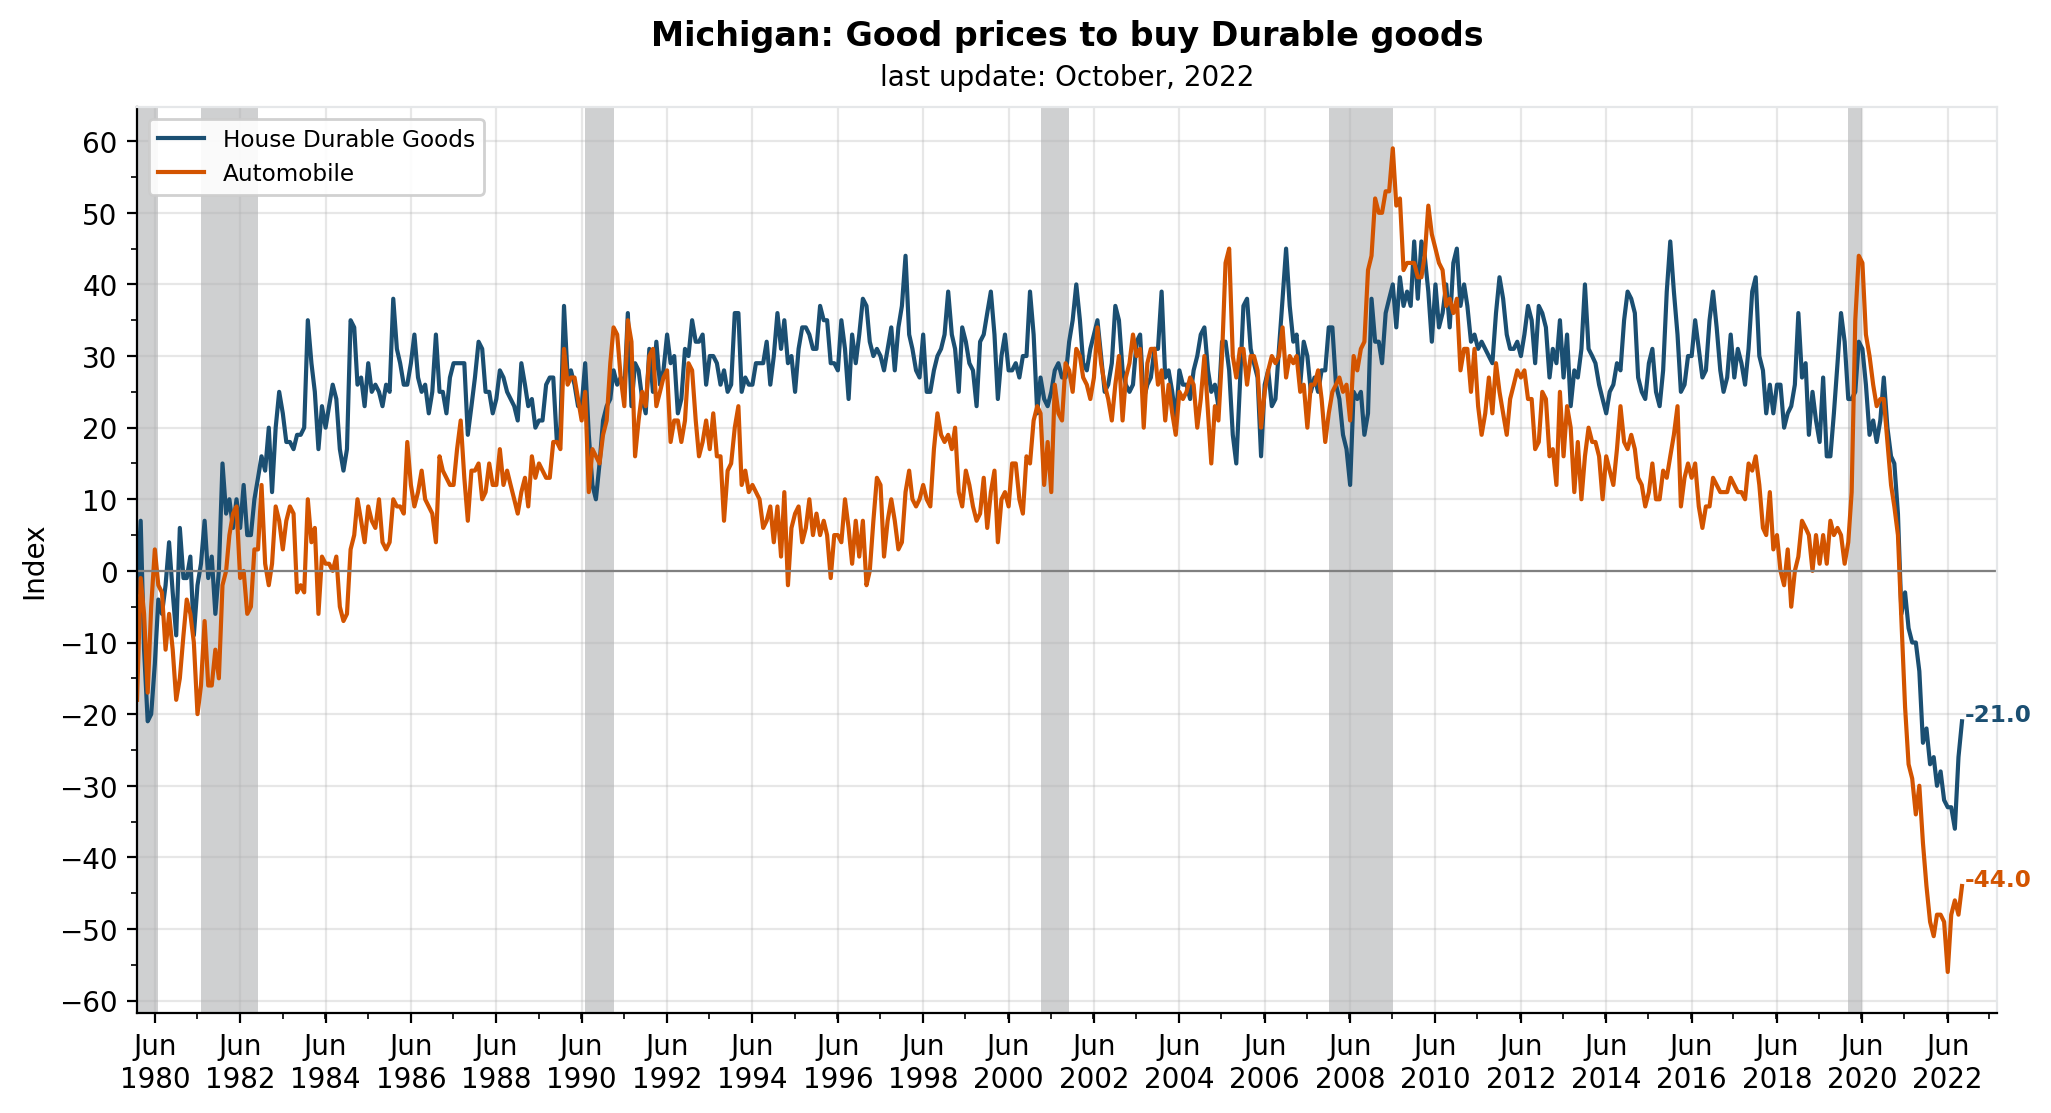

In [43]:
# durrn_np_all: House durable goods inflation
# vehrn_np_all: automobiles

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

data = (
    michigan[michigan["series_id"].isin(["durrn_np_all","vehrn_np_all"])]
    .copy()
    .replace(["durrn_np_all","vehrn_np_all"],["House Durable Goods","Automobile"])
)

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

# creating the df to map chart configuration:
df_code = pd.DataFrame({
    'series_id': ["House Durable Goods","Automobile"],
    'hue': [fn.colors[0], fn.colors[1]],
    'alpha':[1,1],
    'annotation':[True,True]})

# plotting
fig, ax = fn.ts_plot(df = data,
                     df_map = df_code,
                     start_date = "1980-01-01",
                     title ='Michigan: Good prices to buy Durable goods',
                     ylab='Index',
                     fig_size = (12,6), legend_loc = "upper left",
                     plot_recession = True, hline = True, hline_loc = 0,
                     xmargin = 0.00, ymargin = 0.05,
                     y_major_loc = 10, y_minor_loc = 2,
                     x_major_loc = 24, x_minor_loc = 2, x_format = "%b\n%Y", n=300)

plt.show()

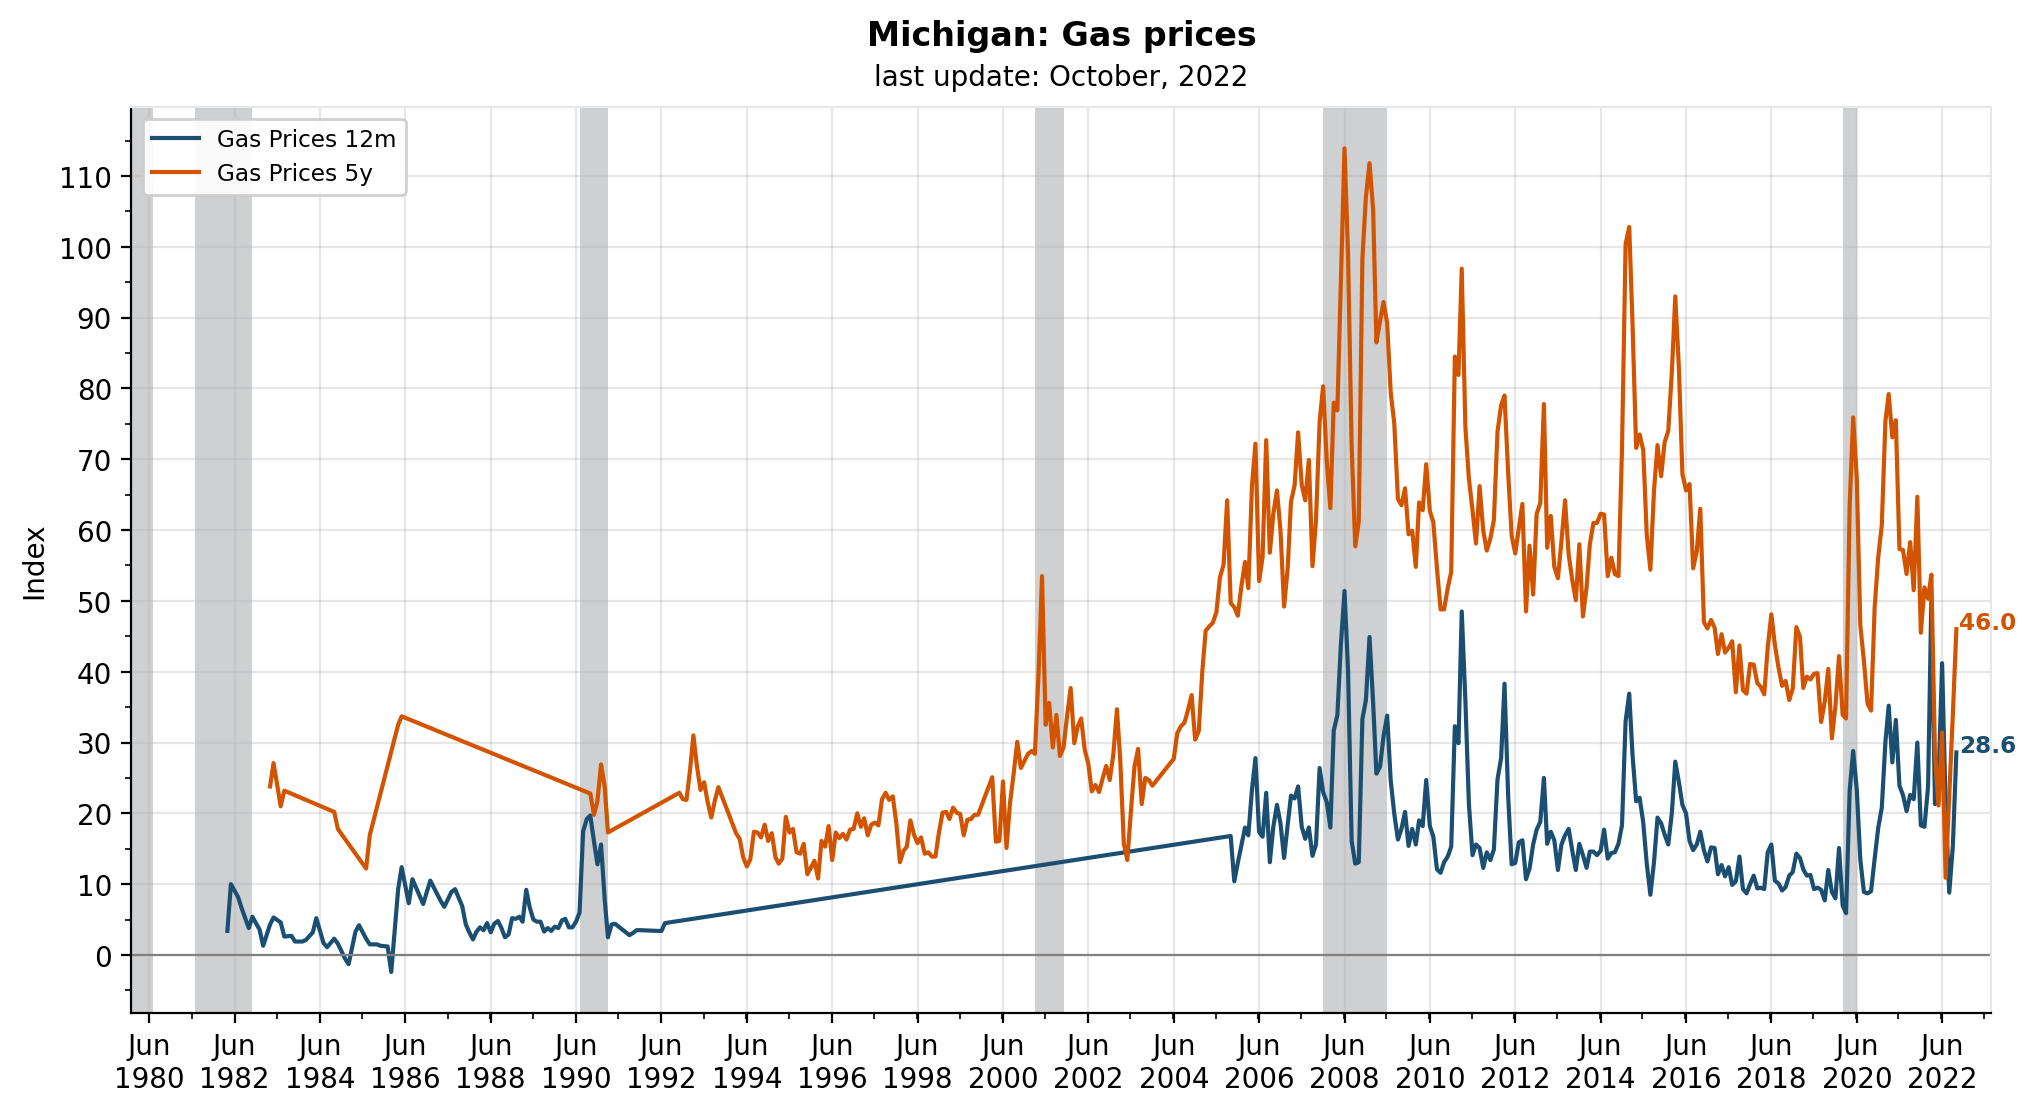

In [44]:
# gas1px_mean_all: 12 months gasoline prices
# gas5px_mean_all: 5y gasoline prices

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

data = (
    michigan[michigan["series_id"].isin(["gas1px_mean_all","gas5px_mean_all"])]
    .copy()
    .replace(["gas1px_mean_all","gas5px_mean_all"],["Gas Prices 12m","Gas Prices 5y"])
)

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

# creating the df to map chart configuration:
df_code = pd.DataFrame({
    'series_id': ["Gas Prices 12m","Gas Prices 5y"],
    'hue': [fn.colors[0], fn.colors[1]],
    'alpha':[1,1],
    'annotation':[True,True]})

# plotting
fig, ax = fn.ts_plot(df = data,
                     df_map = df_code,
                     start_date = "1980-01-01",
                     title ='Michigan: Gas prices',
                     ylab='Index',
                     fig_size = (12,6), legend_loc = "upper left",
                     plot_recession = True, hline = True, hline_loc = 0,
                     xmargin = 0.00, ymargin = 0.05,
                     y_major_loc = 10, y_minor_loc = 2,
                     x_major_loc = 24, x_minor_loc = 2, x_format = "%b\n%Y", n=300)

plt.show()

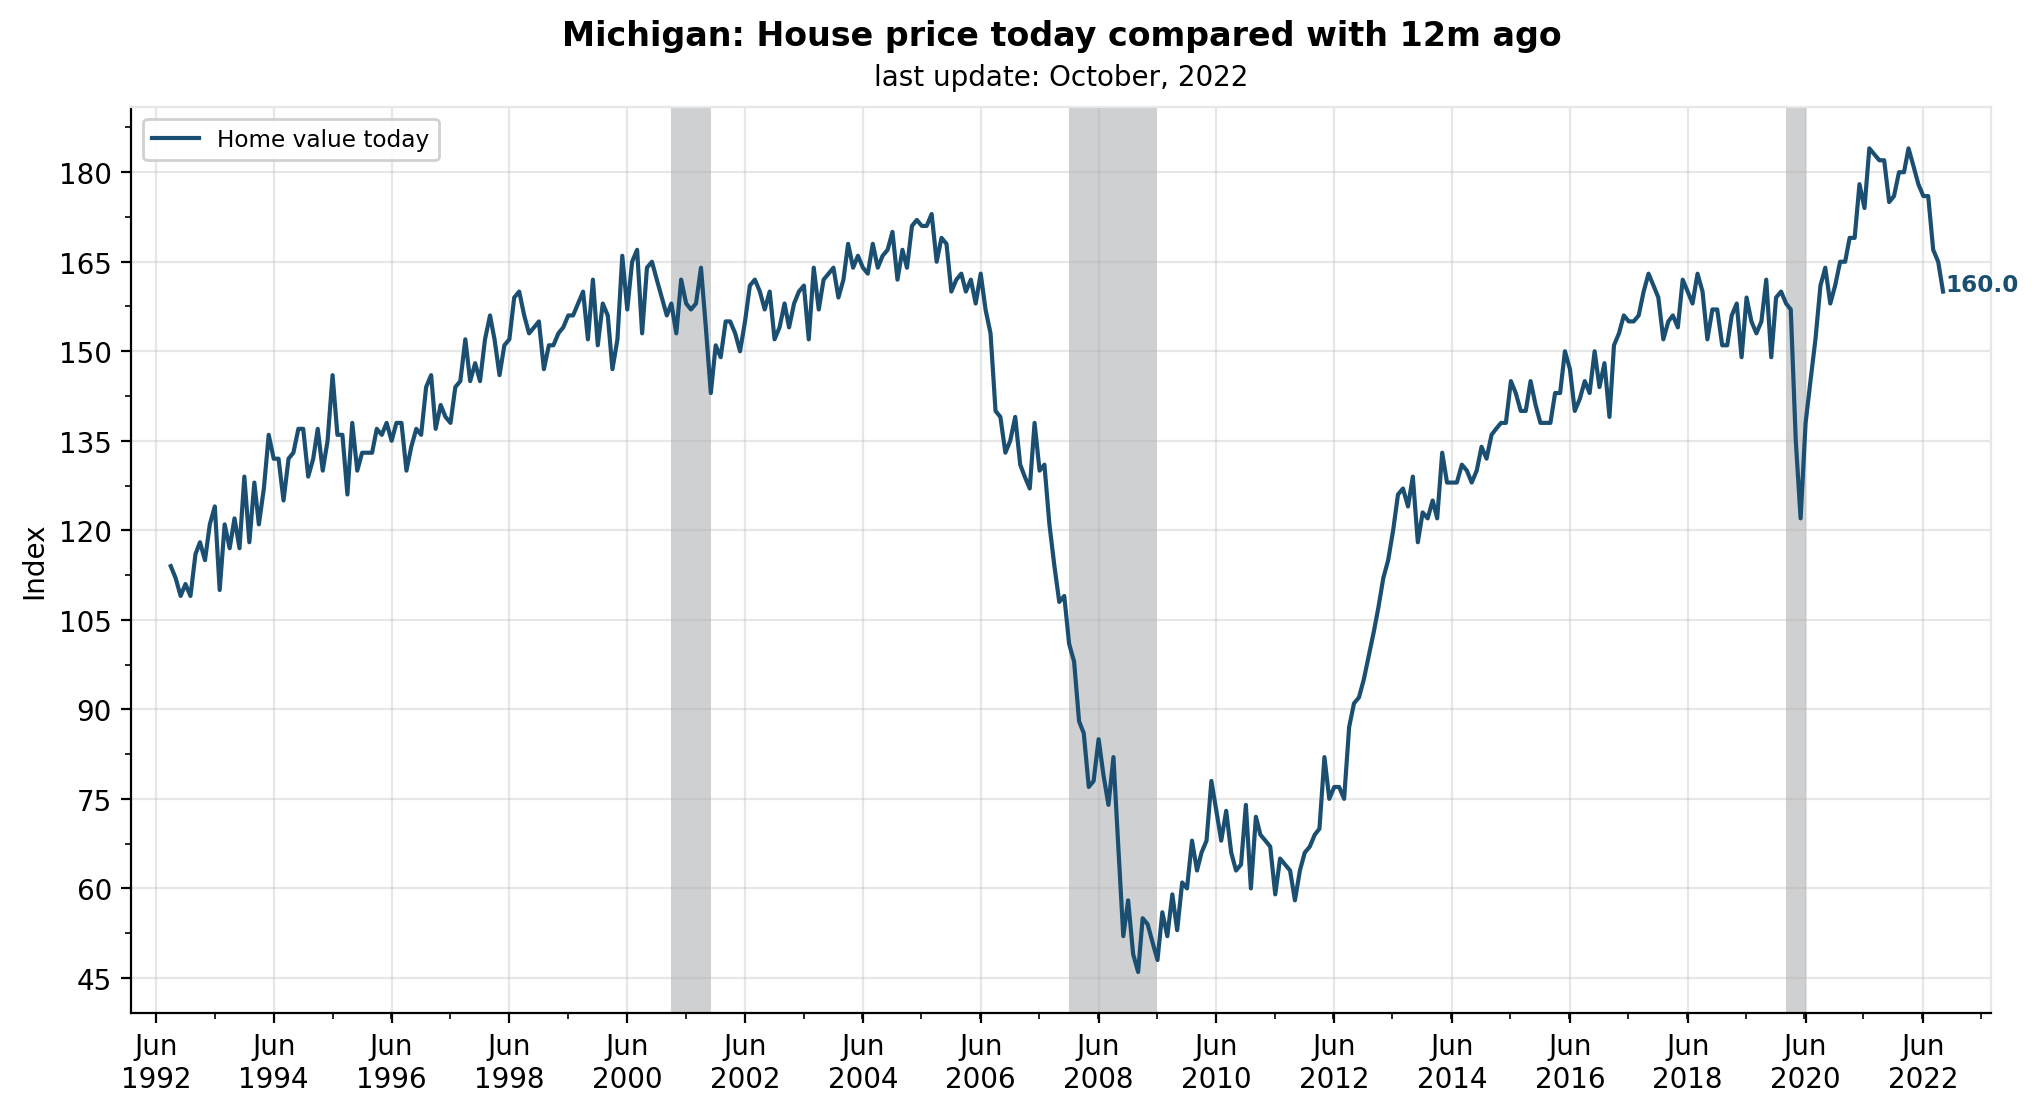

In [45]:
# homval_r_all: house value today compared 12m ago

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

data = (
    michigan[michigan["series_id"].isin(["homval_r_all"])]
    .copy()
    .replace(["homval_r_all"],
             ["Home value today"])
)

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

# creating the df to map chart configuration:
df_code = pd.DataFrame({
    'series_id': ["Home value today"],
    'hue': [fn.colors[0]],
    'alpha':[1],
    'annotation':[True]})

# plotting
fig, ax = fn.ts_plot(df = data,
                     df_map = df_code,
                     start_date = "1992-01-01",
                     title ='Michigan: House price today compared with 12m ago',
                     ylab='Index',
                     fig_size = (12,6), legend_loc = "upper left",
                     plot_recession = True, hline = False, hline_loc = 0,
                     xmargin = 0.00, ymargin = 0.05,
                     y_major_loc = 15, y_minor_loc = 2,
                     x_major_loc = 24, x_minor_loc = 2, x_format = "%b\n%Y", n=300)

plt.show()

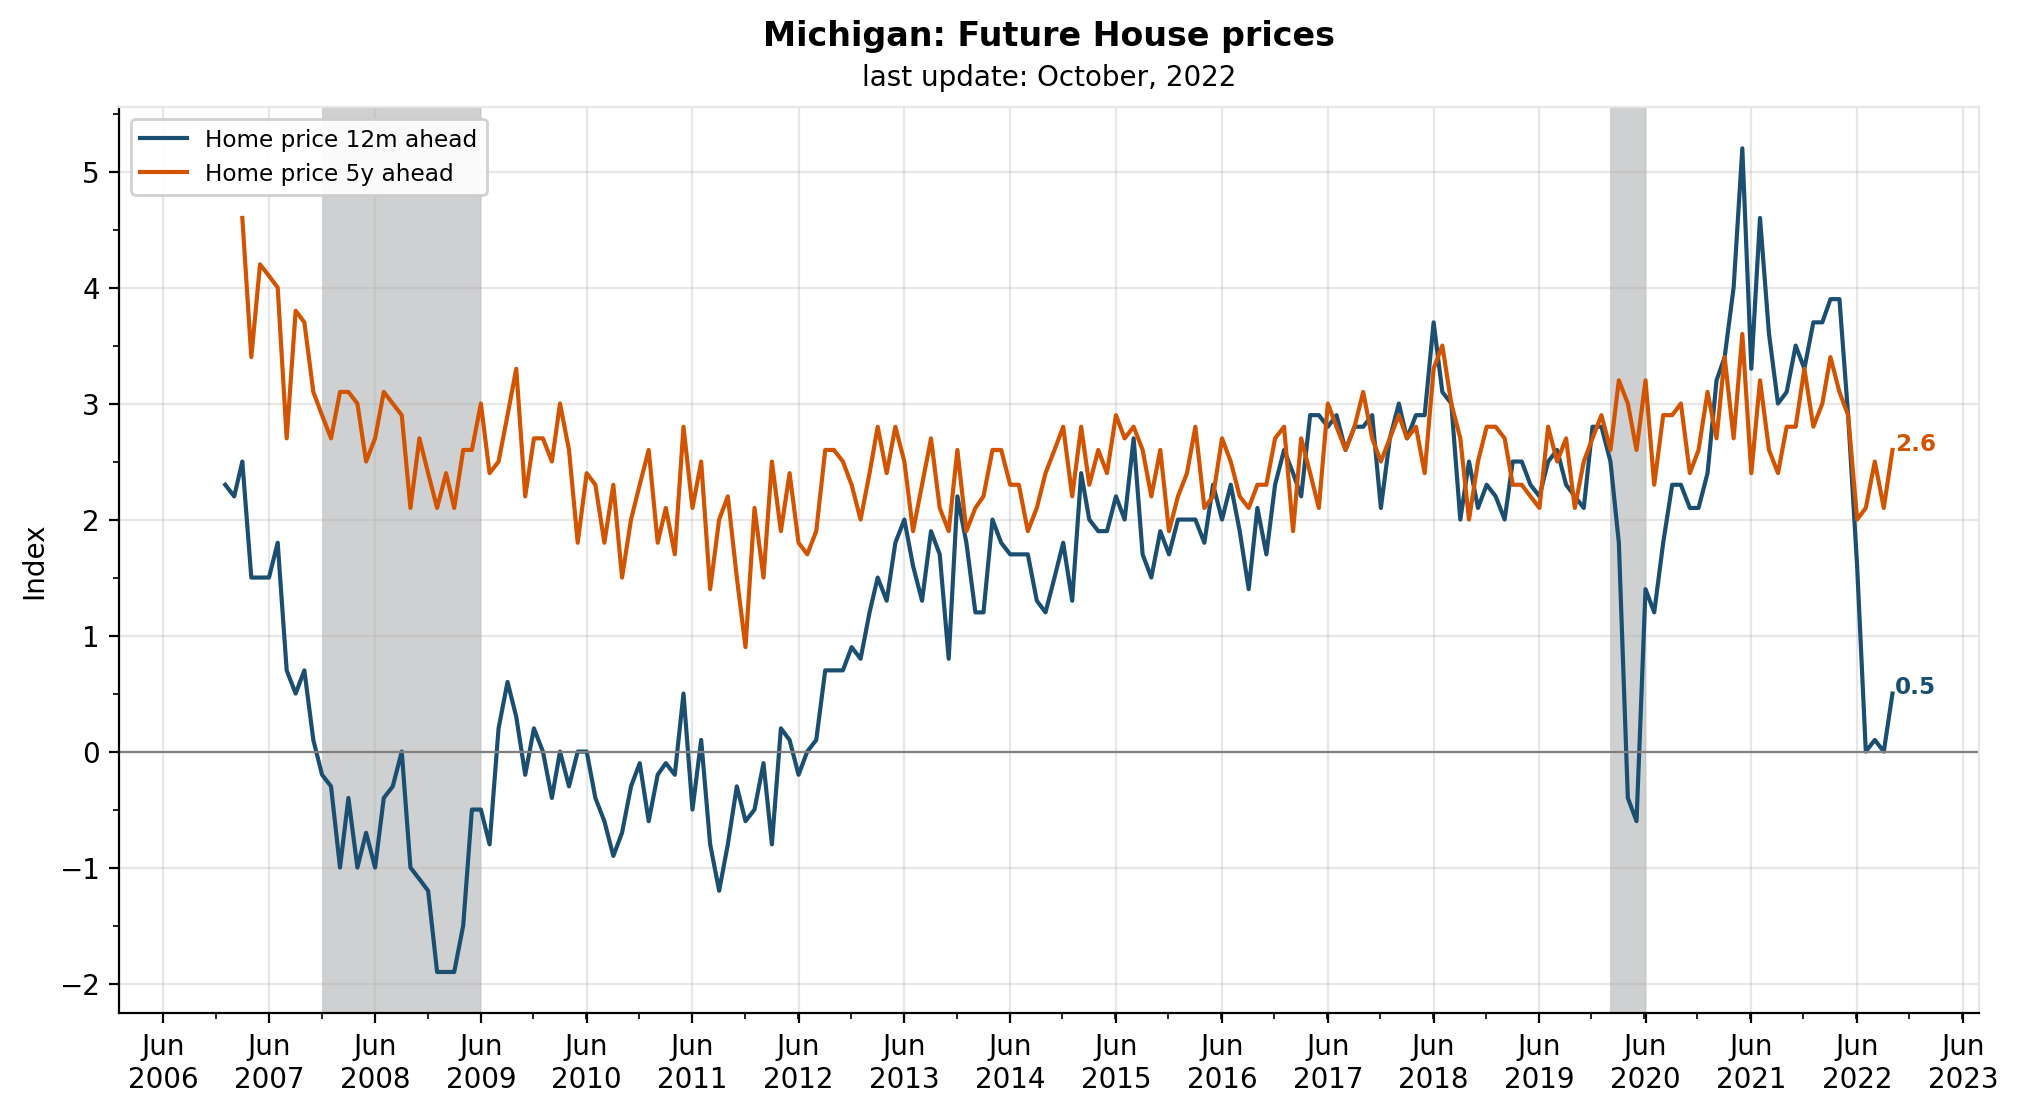

In [46]:
# hopx1_mean_all: housing prices next 12 months
# hopx5_mean_all: housing prices next 5y

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

data = (
    michigan[michigan["series_id"].isin(["hompx1_mean_all","hompx5_mean_all"])]
    .copy()
    .replace(["hompx1_mean_all","hompx5_mean_all"],
             ["Home price 12m ahead","Home price 5y ahead"])
)

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

# creating the df to map chart configuration:
df_code = pd.DataFrame({
    'series_id': ["Home price 12m ahead","Home price 5y ahead"],
    'hue': [fn.colors[0], fn.colors[1]],
    'alpha':[1,1],
    'annotation':[True,True]})

# plotting
fig, ax = fn.ts_plot(df = data,
                     df_map = df_code,
                     start_date = "2006-01-01",
                     title ='Michigan: Future House prices',
                     ylab='Index',
                     fig_size = (12,6), legend_loc = "upper left",
                     plot_recession = True, hline = True, hline_loc = 0,
                     xmargin = 0.00, ymargin = 0.05,
                     y_major_loc = 1, y_minor_loc = 2,
                     x_major_loc = 12, x_minor_loc = 2, x_format = "%b\n%Y", n=300)

plt.show()

## Conference Board

In [27]:
display(conf_board.tail())
conf_board.series_id.unique()

,date,series_id,value
1370,2022-07-31,Conference Board Inlation Expectations 12m_SA_Pct,7.4
1371,2022-08-31,Conference Board Inlation Expectations 12m_SA_Pct,7.0
1372,2022-09-30,Conference Board Inlation Expectations 12m_SA_Pct,6.8
1373,2022-10-31,Conference Board Inlation Expectations 12m_SA_Pct,6.9
1374,2022-11-30,Conference Board Inlation Expectations 12m_SA_Pct,7.2


array(['Conference Board Consumer Confidence_SA_Index',
       'Conference Board Present Situation_SA_Index',
       'Conference Board Expectations_SA_Index',
       'Conference Board Plentiful less Hard to Get_SA_Index',
       'Conference Board Inlation Expectations 12m_SA_Pct'], dtype=object)

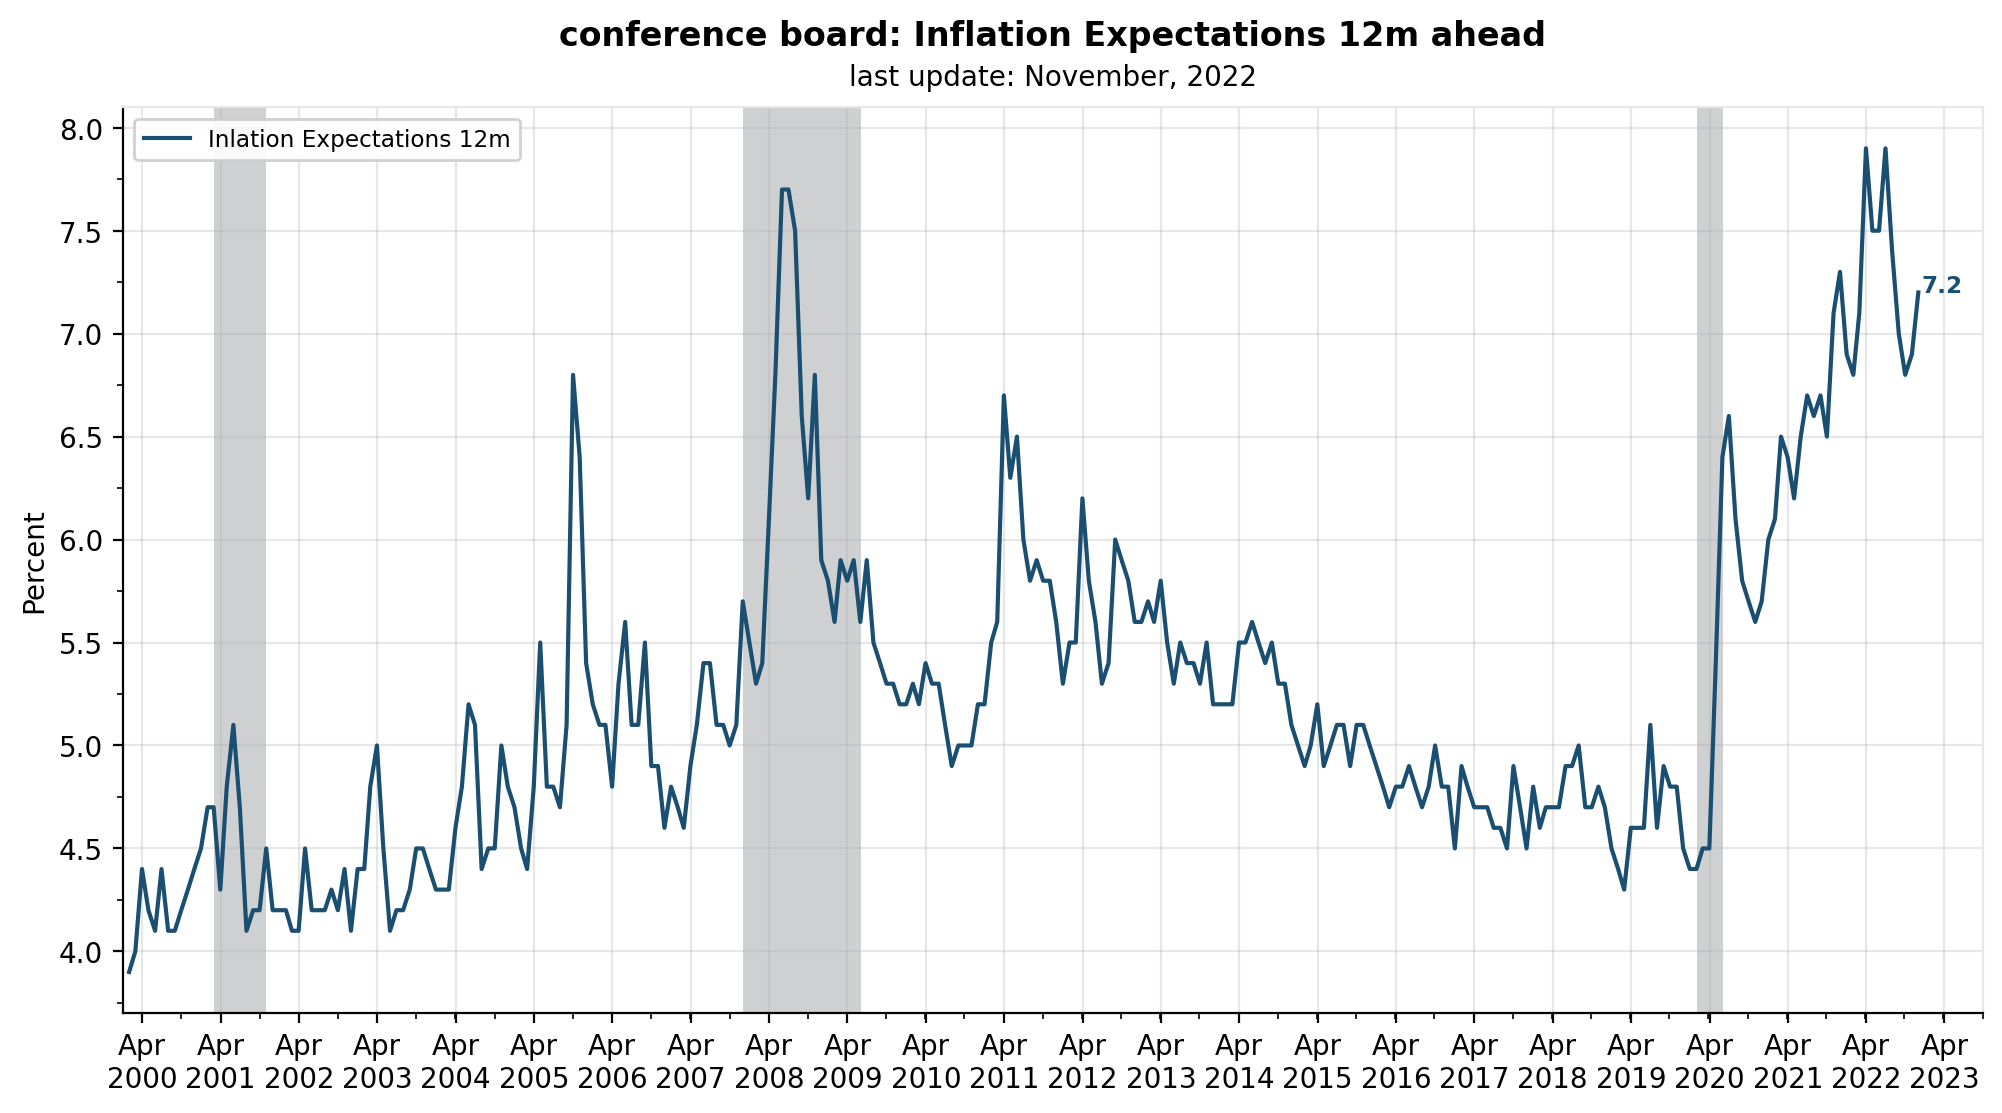

In [33]:
# Conference Board Inlation Expectations 12m_SA_Pct

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

data = (
    conf_board[conf_board["series_id"].isin(["Conference Board Inlation Expectations 12m_SA_Pct"])]
    .copy()
    .replace(["Conference Board Inlation Expectations 12m_SA_Pct"],
             ["Inlation Expectations 12m"])
)

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

# creating the df to map chart configuration:
df_code = pd.DataFrame({
    'series_id': ["Inlation Expectations 12m"],
    'hue': [fn.colors[0]],
    'alpha':[1],
    'annotation':[True]})

# plotting
fig, ax = fn.ts_plot(df = data,
                     df_map = df_code,
                     start_date = "2000-01-01",
                     title ='conference board: Inflation Expectations 12m ahead',
                     ylab='Percent',
                     fig_size = (12,6), legend_loc = "upper left",
                     plot_recession = True, hline = False, hline_loc = 0,
                     xmargin = 0.00, ymargin = 0.05,
                     y_major_loc = 0.5, y_minor_loc = 2,
                     x_major_loc = 12, x_minor_loc = 2, x_format = "%b\n%Y", n=300)

plt.show()